In [ ]:
import pandas as pd
import os 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Path to the H5 file
h5_file_path = "/content/drive/MyDrive/pattern recognition photos/pr_dataset.h5"

# Open the H5 file in read mode
with h5py.File(h5_file_path, "r") as hf:
    # Get the image and label datasets
    images = hf["images"][:]
    labels = hf["labels"][:]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.4, random_state=0)

# Print the shapes of the train and test sets
print("Train Set - Images:", x_train.shape)
print("Train Set - Labels:", y_train.shape)
print("Test Set - Images:", x_test.shape)
print("Test Set - Labels:", y_test.shape)

Train Set - Images: (75, 256, 256)
Train Set - Labels: (75,)
Test Set - Images: (50, 256, 256)
Test Set - Labels: (50,)


In [ ]:
x_train = x_train / 255
x_test = x_test / 255

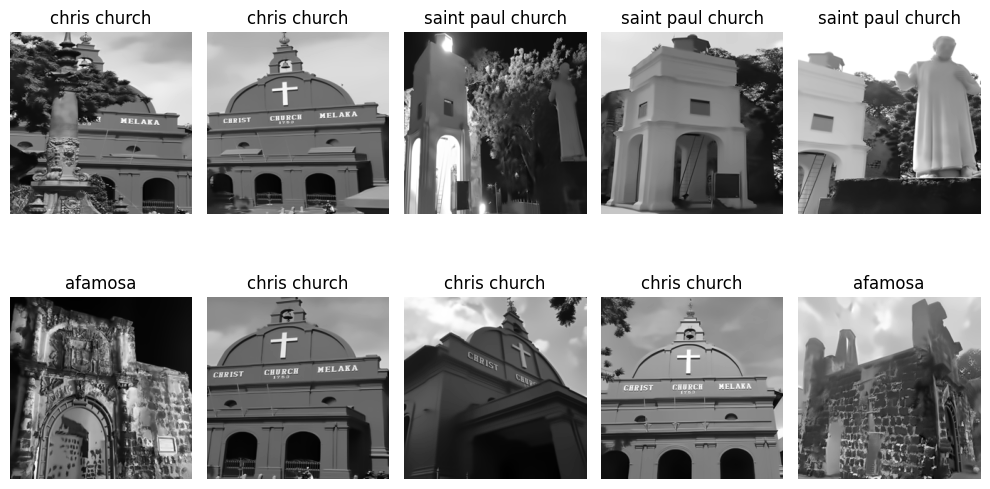

In [ ]:
class_names = {0: "afamosa", 1: "chris church", 2: "saint paul church"}
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))
axes = axes.flatten()
for i in range(10):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(class_names[y_train[i]])
    axes[i].axis('off')
plt.tight_layout()
plt.show()
  

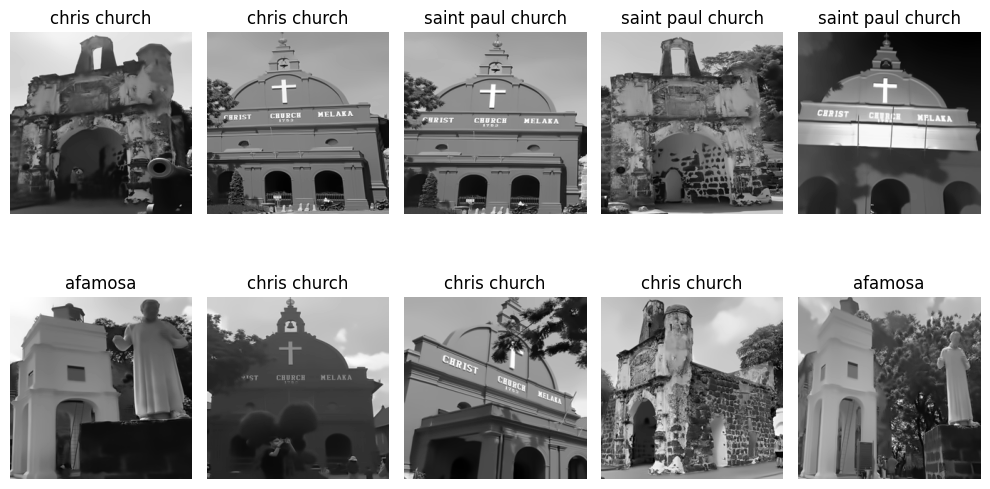

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))
axes = axes.flatten()
for i in range(10):
    axes[i].imshow(x_test[i], cmap='gray')
    axes[i].set_title(class_names[y_train[i]])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
x_train_flat = x_train.reshape(-1, x_train.shape[1]*x_train.shape[2])
x_test_flat = x_test.reshape(-1, x_test.shape[1]*x_test.shape[2])
print(x_train_flat.shape, x_test_flat.shape)

(75, 65536) (50, 65536)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)


In [ ]:

from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create an instance of the SVM classifier
svm_classifier = SVC()

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [25, 10, 20],
    'gamma': [0.1, 0.01, 0.001],
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(x_train_pca, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the performance on the testing set using the best model
best_rf_classifier = grid_search.best_estimator_
y_test_pred = best_rf_classifier.predict(x_test_pca)

# Evaluate the performance on the testing set
accuracy = grid_search.score(x_train_pca, y_train)
print(f"Training Accuracy: {accuracy:.2f}")

# Evaluate the performance on the testing set
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {accuracy:.2f}")

Best Hyperparameters: {'C': 25, 'gamma': 0.001}
Training Accuracy: 1.00
Testing Accuracy: 0.96


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.91      1.00      0.95        21
           2       1.00      0.92      0.96        13

    accuracy                           0.96        50
   macro avg       0.97      0.95      0.96        50
weighted avg       0.96      0.96      0.96        50



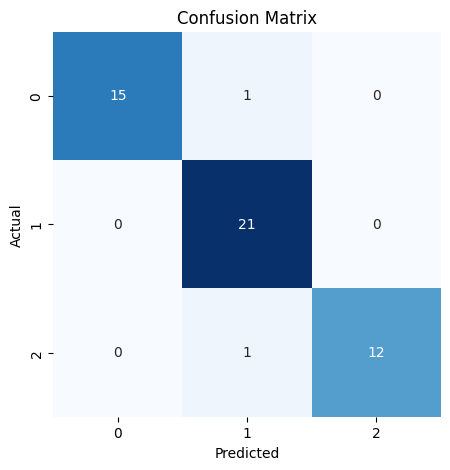

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()